In [172]:
#Import modules

import pandas as pd
import requests
import numpy as np
import json
from dotenv import load_dotenv
import sys
import os
from alpaca_trade_api.rest import TimeFrame, URL
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import hvplot.pandas

In [173]:
#import environment variables
load_dotenv()
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
type(alpaca_api_key)

str

In [174]:
#Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

**Below we are going to define functions we will be using repeatedly within the project -- will probably need to be moved to a separate .py file in order to "modularize" our app.  We will then be able to import the relevant functions from the separate file.

In [175]:
def get_historical_dataframe (ticker, start_date, end_date, timeframe):
    ticker_df = alpaca.get_barset(ticker, timeframe, end = end_date, start = start_date, limit = 1000).df
    ticker_df.reindex(columns = ticker_df.columns)
    return ticker_df
def filter_close_prices(dataframe):
    df_close = pd.DataFrame()
    df_close['close'] = dataframe['close']
    return df_close
def calc_daily_returns(df_close_prices):
    daily_returns = df_close_prices.pct_change().dropna()
    return daily_returns

In [176]:
#Establish ARK API variables -- base url for api calls, request type i.e. profile, trades, etc., etf_symbol for desired etf and additional arguments as parameters
 
holdings_symbol = 'ARKK'
holdings_url = 'https://arkfunds.io/api/v2/etf/holdings'  

#Initial API call to establish current positions for ARKK
# need to code for an error response if API call is unsuccessfsul i.e. if response.status_code == 200:
response = requests.get(holdings_url, params = {'symbol' : 'ARKK'}).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "date_from": "2021-11-11",
    "date_to": "2021-11-11",
    "holdings": [
        {
            "company": "TESLA INC",
            "cusip": "88160R101",
            "date": "2021-11-11",
            "fund": "ARKK",
            "market_value": 2118197660.8,
            "share_price": 1067.95,
            "shares": 1983424,
            "ticker": "TSLA",
            "weight": 10.48,
            "weight_rank": 1
        },
        {
            "company": "TELADOC HEALTH INC",
            "cusip": "87918A105",
            "date": "2021-11-11",
            "fund": "ARKK",
            "market_value": 1364498235.36,
            "share_price": 137.04,
            "shares": 9956934,
            "ticker": "TDOC",
            "weight": 6.75,
            "weight_rank": 2
        },
        {
            "company": "COINBASE GLOBAL INC -CLASS A",
            "cusip": "19260Q107",
            "date": "2021-11-11",
            "fund": "ARKK",
            "market_value": 1251226978.6,
         

**Something for us to consider -- would it be better to utilize dataframes or databases to manipulate and analyze our data?

In [177]:
# We want to create a dataframe with the relevant 'holdings' data from the json object returned above
holdings_df = pd.DataFrame(response['holdings']).dropna(axis=0)
display(holdings_df)

#Check to confirm we have dropped null values in our DataFrame
display(holdings_df.isnull().sum())


,fund,date,ticker,company,cusip,shares,market_value,share_price,weight,weight_rank
0,ARKK,2021-11-11,TSLA,TESLA INC,88160R101,1983424,2.118198e+09,1067.95,10.48,1
1,ARKK,2021-11-11,TDOC,TELADOC HEALTH INC,87918A105,9956934,1.364498e+09,137.04,6.75,2
2,ARKK,2021-11-11,COIN,COINBASE GLOBAL INC -CLASS A,19260Q107,3807751,1.251227e+09,328.60,6.19,3
3,ARKK,2021-11-11,U,UNITY SOFTWARE INC,91332U101,6900127,1.217527e+09,176.45,6.02,4
4,ARKK,2021-11-11,ROKU,ROKU INC,77543R102,3817343,1.048242e+09,274.60,5.19,5
5,ARKK,2021-11-11,ZM,ZOOM VIDEO COMMUNICATIONS-A,98980L101,3676776,9.238267e+08,251.26,4.57,6
6,ARKK,2021-11-11,SPOT,SPOTIFY TECHNOLOGY SA,L8681T102,3013827,8.128894e+08,269.72,4.02,7
7,ARKK,2021-11-11,SHOP,SHOPIFY INC - CLASS A,82509L107,503773,7.425614e+08,1474.00,3.67,8
8,ARKK,2021-11-11,PATH,UIPATH INC - CLASS A,90364P105,12948556,7.252486e+08,56.01,3.59,9
9,ARKK,2021-11-11,SQ,SQUARE INC - A,852234103,3127502,7.105997e+08,227.21,3.52,10


fund            0
date            0
ticker          0
company         0
cusip           0
shares          0
market_value    0
share_price     0
weight          0
weight_rank     0
dtype: int64

**To be done for project -- we need to find a solution for null values in our holdings dataframe as it could change and we do not necessarily want to have to dig in and figure out which value is null and what belongs there... possibly create an if/then statement for null values and how to handle them i.e. alert the user of the null value and provide options for  how to handle it.  For the purposes of our MVP, we are going to drop rows with null values since the recurring null value is for a ticker with very little impact on the portfolio.  For future consideration would be a more elegant way to handle null values, but for now we will simply drop them.  NOTE:  this will cause our weights to not equal 100, thus we must rebalance the weights so we can run our calculations.

In [178]:
# For our purposes we want to focus on the 'ticker','weight', and 'company' columns of the dataframe.  This will allow us to perform historical research with the Alpaca API as well as plot the weights of the portfolio stocks.
display(filtered_df.head())

# Note that for our Monte Carlo simulations, we will need to divide the weights column by 100 since the sum of weights for the simulation needs to be 1, and the dataframe is configured for the sum to be 100.

filtered_df.hvplot.bar(x='ticker', y = 'weight', hover_color = 'red', hover_cols = ['ticker', 'weight', 'company'],rot=90, title = 'Stock tickers and their corresponding weights in the portfolio')

,ticker,weight,company
0,TSLA,10.48,TESLA INC
1,TDOC,6.75,TELADOC HEALTH INC
2,COIN,6.19,COINBASE GLOBAL INC -CLASS A
3,U,6.02,UNITY SOFTWARE INC
4,ROKU,5.19,ROKU INC


:Bars   [ticker]   (weight,company)

In [179]:
#Use data from ARKK API call to get historical quotes from Alpaca
tickers = filtered_df['ticker'].astype(str).tolist()
timeframe = '1D'
today = pd.Timestamp.now(tz="America/New_York")
three_years_ago = pd.Timestamp(today - pd.Timedelta(days=1095)).isoformat()
end_date = today
# Do we want to use 1, 2, 3 years of historical data or more?
start_date = three_years_ago
# Here we are retrieving the historical data for the stocks in the ARKK portfolio.  
# We then filter the results to leave us with closing price and ticker columns with a datetime index 
# so we can run our analyses.
portfolio_df = get_historical_dataframe(tickers, start_date, end_date, timeframe)
display(portfolio_df.head())

BEAM                        BLI                 \
                          open high low close volume open high low close   
time                                                                       
2018-11-12 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2018-11-13 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2018-11-14 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2018-11-15 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2018-11-16 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   

                                  ...      Z                                 \
                          volume  ...   open    high    low  close   volume   
time                              ...                                         
2018-11-12 00:00:00-05:00    NaN  ...  30.15  31.740  29.88  31.01  3838022   
2018-11-13 00:00:00-05:00    NaN  ...  31.39  31.890  30.44  30.46  2608365   
2018-11-14 00:00:00-05:00    NaN  ...  30.81  31.031  28.36  28.41  3992309   
2018-11-15 00:00:00-05:00    NaN  ...  28.49  28.640  27.00  28.05  4609929   
2018-11-16 00:00:00-05:00    NaN  ...  28.05  29.275  27.66  28.91  2457804   

                            ZM                        
                          open high low close volume  
time                                                  
2018-11-12 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  
2018-11-13 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  
2018-11-14 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  
2018-11-15 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  
2018-11-16 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  

[5 rows x 220 columns]

**TBD for project -- how will we handle timeframes for our historical analyses i.e. do we want a hard coded time period or allow for user input?  Also how will this affect stocks that have no data for certain periods as well as those who have a more extensive price history.

**One thing to consider for our daily returns calculations.. it's possible we can just set up the Monte Carlo simulation and then pull the returned daily returns to use in our risk/return analyses -- YES WE CAN!

**Below we create functions for the monte carlo simulations... these will probably need to be separated into a separate module.

In [180]:
def configure_monte_carlo(dataframe, weights, num_simulations, num_trading_days):
    simulation_input_df = MCSimulation(
    portfolio_data = dataframe,
    weights = weights,
    num_simulation = num_simulations,
    num_trading_days = num_trading_days
    )
    return simulation_input_df

def run_monte_carlo(simulation_input_df):
    simulation_returns_df = simulation_input_df.calc_cumulative_return()
    return simulation_returns_df

def plot_simulation_outcomes(simulation_input_df):
    simulation_plot = simulation_input_df.plot_simulation()
    return simulation_plot

def plot_distribution(simulation_input_df):
    sim_dist_plot = simulation_input_df.plot_distribution()
    return sim_dist_plot

def get_monte_summary(simulation_input_df):
    summary_stats = simulation_input_df.summarize_cumulative_return()
    return summary_stats

# In order to use the weights from the portfolio dataframe in our Monte Carlo simulations, we will need to divide them by 100.
# display(holdings_df.weight)
# Dividing the weights by 100
mc_weights = list(holdings_df.weight / 100)
# display(mc_weights)

# Creating initial MC Simulation DataFrame 
arkk_sim_input = configure_monte_carlo(portfolio_df, mc_weights, 100, 252*3)
arkk_sim_input.portfolio_data.tail()

BEAM                                    \
                            open    high      low  close    volume   
time                                                                 
2021-11-05 00:00:00-04:00  92.92   93.14  86.7500  89.27  577891.0   
2021-11-08 00:00:00-05:00  93.00   99.43  90.0300  99.21  690125.0   
2021-11-09 00:00:00-05:00  99.05  100.06  95.0600  97.77  449485.0   
2021-11-10 00:00:00-05:00  96.44   97.70  88.4204  91.30  583839.0   
2021-11-11 00:00:00-05:00  92.06   95.46  91.9250  93.43  263320.0   

                                          BLI                        ...  \
                          daily_return   open   high     low  close  ...   
time                                                                 ...   
2021-11-05 00:00:00-04:00    -0.044525  23.84  24.84  23.700  24.38  ...   
2021-11-08 00:00:00-05:00     0.111348  24.23  25.24  24.210  24.54  ...   
2021-11-09 00:00:00-05:00    -0.014515  24.50  24.90  24.040  24.55  ...   
2021-11-10 00:00:00-05:00    -0.066176  25.14  26.75  24.220  25.14  ...   
2021-11-11 00:00:00-05:00     0.023330  25.45  26.03  24.915  25.62  ...   

                               Z                                      ZM  \
                             low   close    volume daily_return     open   
time                                                                       
2021-11-05 00:00:00-04:00  64.90  66.060  17468675    -0.020898  267.550   
2021-11-08 00:00:00-05:00  65.81  67.660  10111870     0.024220  262.485   
2021-11-09 00:00:00-05:00  65.23  66.410   7184709    -0.018475  260.990   
2021-11-10 00:00:00-05:00  63.72  64.230   7503234    -0.032826  257.020   
2021-11-11 00:00:00-05:00  63.28  63.645   4786784    -0.009108  251.490   

                                                                            
                             high     low    close     volume daily_return  
time                                                                        
2021-11-05 00:00:00-04:00  275.64  259.77  264.810  5054335.0    -0.061922  
2021-11-08 00:00:00-05:00  263.18  257.94  259.870  3547234.0    -0.018655  
2021-11-09 00:00:00-05:00  265.66  257.57  258.400  2746806.0    -0.005657  
2021-11-10 00:00:00-05:00  259.47  249.00  251.250  4632234.0    -0.027670  
2021-11-11 00:00:00-05:00  253.19  245.16  247.605  2971369.0    -0.014507  

[5 rows x 264 columns]

In [181]:
# We will isolate the daily returns column from our MC_portfolio dataframe in order to run our risk / return analyses by
# merging the 'daily_return' series from our dataframe 
daily_returns_df = pd.DataFrame()
# Iterate through tickers in our MC DataFrame, filter to isolate 'daily_return' data, then concat the resulting series into 
# dataframe we can use for our analyses
for ticker in tickers:
    daily_returns = arkk_sim_input.portfolio_data[ticker]['daily_return']
    daily_returns_df = pd.concat([daily_returns_df, daily_returns], axis=1)
daily_returns_df.columns = tickers
display(daily_returns_df.head())

,TSLA,TDOC,COIN,U,ROKU,ZM,SPOT,SHOP,PATH,SQ,...,IOVA,SSYS,BLI,TRMB,Z,MTLS,CERS,CGEN,PRLB,NSTG
2018-11-12 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-13 00:00:00-05:00,0.022528,-0.033851,NaN,NaN,0.023149,NaN,0.002361,0.023753,NaN,0.027959,...,-0.022388,-0.009557,NaN,0.000696,-0.017736,-0.002179,0.009506,0.016026,-0.001491,0.021611
2018-11-14 00:00:00-05:00,0.016361,-0.018971,NaN,NaN,0.017205,NaN,0.017321,0.028823,NaN,-0.027302,...,-0.040349,-0.028728,NaN,-0.013218,-0.067301,-0.008006,-0.050847,0.025237,0.018081,-0.005769
2018-11-15 00:00:00-05:00,0.012378,0.050000,NaN,NaN,0.031742,NaN,0.022851,0.051198,NaN,0.054131,...,0.082955,-0.009709,NaN,0.008178,-0.012672,0.035216,0.049603,0.046154,0.026640,0.087041
2018-11-16 00:00:00-05:00,0.016877,-0.019910,NaN,NaN,0.000449,NaN,-0.019347,0.006130,NaN,-0.041299,...,0.006296,0.021432,NaN,-0.006434,0.030660,-0.002126,-0.000945,-0.020588,0.006031,0.003559


In [182]:
# Calculating standard deviations of the daily returns and plotting the results.
daily_returns_std = daily_returns_df.std().sort_values()
display(daily_returns_std.head())
# TODO -- rename columns or alter plot in a way to better label values on hover
daily_returns_std.hvplot.bar(colorbar=True, xlabel='Stock Tickers', ylabel = 'Standard Deviation (x 100 to get %)', title='Stocks within the ARKK portfolio and the standard deviation of their daily returns', rot=90, color='orange')

TRMB    0.024182
SPOT    0.029330
IRDM    0.031517
TWTR    0.032286
DOCU    0.032449
dtype: float64

:Bars   [index]   (0)

**At some point would we like to also plot returns for QQQ or S&P and ARKK and some other fund for reference?

In [183]:
# Calculating and plotting cumulative returns for the stocks in ARKK
daily_returns_cumprod = (1 + daily_returns_df).cumprod()
portfolio_cum_plot = daily_returns_cumprod.hvplot(kind = 'line', rot=90, title = 'Cumulative returns for the individual stocks in ARKK', ylabel = 'Returns', xlabel = 'Date')
display(portfolio_cum_plot)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

**TODO -- we need to run other risk / return analyses on the fund i.e. sharpe ratio, other variance measures to complete the full picture of the analysis

### Calling the Monte Carlo functions and running projections -- 

In [184]:
# Run the simulation
run_monte_carlo(arkk_sim_input)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

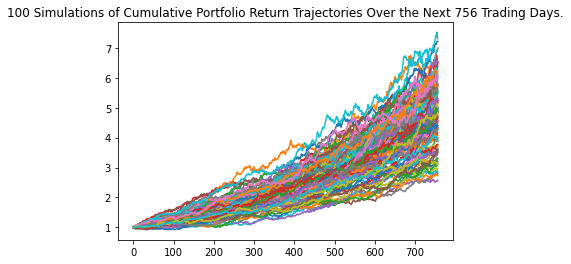

In [187]:
# Plotting the projected returns via the MCForecast projections
plot_simulation_outcomes(arkk_sim_input)

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

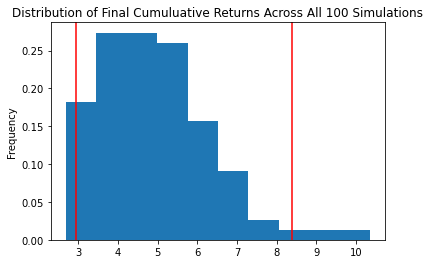

In [163]:
# Plotting distribrution and confidence intervals from Monte Carlo Simulation
plot_distribution(arkk_sim_input)

In [164]:
# Describe the MCForecast Summary
get_monte_summary(arkk_sim_input)

count           100.000000
mean              4.929490
std               1.410692
min               2.683690
25%               3.975547
50%               4.715421
75%               5.701586
max              10.356595
95% CI Lower      2.941784
95% CI Upper      8.374464
Name: 756, dtype: float64

### It would be great if we could produce more customizable / interactive plots based on our simulation returns